<a href="https://colab.research.google.com/github/attmeo/codificaditesti/blob/main/tirocinio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 pip install diffusers transformers accelerate scipy safetensors -U sentence-transformers;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 15.4 MB/s eta 0:00:00
ERROR: Operation cancelled by user


In [ ]:
import torch

from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "stabilityai/stable-diffusion-2-1"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
from transformers import pipeline

model_id = "stabilityai/stable-diffusion-2-1"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
from google.colab import drive
from google.colab import files
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

drive.mount('/content/Mydrive', force_remount=True);

file_path = "/content/Mydrive/MyDrive/Tirocinio/datasetEvents_V1.xlsx";

data = pd.read_excel(file_path, sheet_name = "sentenceList");

Mounted at /content/Mydrive


In [ ]:
path = "/content/Mydrive/MyDrive/Tirocinio/imageCaptioning.xlsx"
df = pd.read_excel(path);
df.head()

,ID,Raw Prompt,Adding Negative Prompting,Adding Modifiers,Adding Context
0,1,a person holding a slice of pizza with peppero...,a person is taking a slice of pizza,a man eating a pizza with a fork,a man eating a pizza
1,2,a woman eating a piece of steak with a fork,a plate of food,a woman is eating a piece of meat,a person is putting a fork into a steak
2,3,a little girl eating an ice cream cone,a baby wearing a hat,a little girl eating an ice cream cone,a baby sitting on the grass
3,4,a dog eating a hot dog food,a dog chewing on a toy,a dog laying on the floor eating a hot dog,a dog with a bone in its mouth
4,5,a cow is eating grass in a field,a cow eating grass in a field,a brown cow walking across a field,a cow with a green grass in its mouth


**Funzione per generare 4 immagini utilizzando tecniche di prompting diverse e per creare un'immagine combinata**

In [ ]:
def mainImageGeneration():

  promptFrame = "a photograph of";

  negPrompt = "ugly, duplicate, picture frame, morbid, mutilated, out of frame, extra fingers, mutated hands, poorly drawn hands, poorly drawn face, poorly drawn eyes, mutation, deformed, ugly, blurry, bad anatomy, bad proportions, extra limbs, cloned face, disfigured, out of frame, ugly, extra limbs, bad anatomy, gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, mutated hands, fused fingers, too many fingers, long neck";
  negPromptWeights = "((((ugly)))), (((duplicate))), (((picture frame))), ((morbid)), ((mutilated)), [out of frame], extra fingers, mutated hands, ((poorly drawn hands)), ((poorly drawn face)), ((poorly drawn eyes)), (((mutation))), (((deformed))), ((ugly)), blurry, ((bad anatomy)), (((bad proportions))), ((extra limbs)), cloned face, (((disfigured))), out of frame, ugly, extra limbs, (bad anatomy), gross proportions, (malformed limbs), ((missing arms)), ((missing legs)), (((extra arms))), (((extra legs))), mutated hands, (fused fingers), (too many fingers), (((long neck)))";
  modifiers = ", award-winning, ((highly-detailed)), ((realistic)), masterpiece, 4k";

  text_labels = ["Raw Prompt",
                 "Adding Negative Prompting",
                 "Adding Modifiers",
                 "Adding Context"]


  promptFrame = "a photograph of";

  for index, row in data.iterrows():

    verb = row["ingForm"];
    arg1 = row["Arg1"];
    arg2 = row["Arg2"];
    context = row["Context"];

    if not pd.isna(row["Art1"]):
      art1 = f' {row["Art1"]} ';
    else:
      art1 = " ";

    if not pd.isna(row["Art2"]):
      art2 = f' {row["Art2"]} ';
    else:
      art2 = " ";

    if not pd.isna(row["Art3"]):
      art3 = f' {row["Art3"]}';
    else:
      art3 = "";

    if not pd.isna(row["Arg3"]):
      arg3 = f' to{art3} {row["Arg3"]}';
    else:
      arg3 = "";

    promptFrame = "a photograph of";

    prompt = f"{promptFrame}{art1}{arg1}{verb}{art2}{arg2}{art3}{arg3}";

    generator = torch.Generator("cuda").manual_seed(index);

    #Generatore immagini da raw prompt
    print("\n Raw Prompt:");
    print(f"{index + 1} {prompt}");

    imageRawPrompt = pipe(prompt,
                          guidance_scale=8.5,
                          num_inference_steps = 50,
                          generator=generator).images[0];

    imageRawPrompt.save(f"/content/Mydrive/MyDrive/Tirocinio/generated_images_simplePrompt/img_{index + 1}.png");

    #Generatore immagini con negative prompting
    print("\n Adding Negative Prompting:");
    print(f"{index + 1} {prompt}");

    imageNegPrompt = pipe(prompt,
                          negative_prompt = negPrompt,
                          guidance_scale=8.5,
                          num_inference_steps = 50,
                          generator=generator).images[0];

    imageNegPrompt.save(f"/content/Mydrive/MyDrive/Tirocinio/generated_images_negPrompt/img_{index + 1}.png");

    #Generatore immagini con negative prompting, modificatori e pesi
    print("\n Complete Prompt:");
    print(f"{index + 1} {prompt}{modifiers}");
    imageComPrompt = pipe(f"{prompt}{modifiers}",
                          negative_prompt = negPromptWeights,
                          guidance_scale=8.5,
                          num_inference_steps = 50,
                          generator=generator).images[0];
    imageComPrompt.save(f"/content/Mydrive/MyDrive/Tirocinio/generated_images_completePrompt/img_{index + 1}.png");

    #Generatore immagini con negative prompting, modificatori, pesi e contesto
    print("\n Adding Context:");
    print(f"{index + 1} {prompt} {context}{modifiers}");
    imageWithContext = pipe(f"{prompt} {context}{modifiers}",
                            negative_prompt = negPromptWeights,
                            guidance_scale=8.5,
                            num_inference_steps = 50,
                            generator=generator).images[0];
    imageWithContext.save(f"/content/Mydrive/MyDrive/Tirocinio/generated_images_withContext/img_{index + 1}.png");

    #Creazione immagine combinata
    images = [imageRawPrompt, imageNegPrompt, imageComPrompt, imageWithContext];

    fig, axs = plt.subplots(1, 4, figsize=(10, 3));

    #Aggiunta delle immagini e delle relative categorie
    for i, ax in enumerate(axs):
      ax.imshow(images[i]);
      ax.set_title(text_labels[i]);
      ax.axis("off");

    prompt = prompt.lower().replace(" is ", " ");
    plt.figtext(0.5, 0.05, f'Prompt: "{prompt}"', ha='center', fontsize=12);

    fig.savefig(f'/content/Mydrive/MyDrive/Tirocinio/imageComparison/img_{index + 1}.png', dpi=300);

    #Pulizia dei sottoplot
    for ax in axs:
        ax.clear()

    print(f'\n Immagine combinata {index + 1} salvata')

    plt.close(fig)






**Funzione per ottenere la caption di ciascuna immagine generata**

In [ ]:
captioner = pipeline(model="Salesforce/blip-image-captioning-base");

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

In [ ]:
def imageCaptioner():

  folder_paths = [
      '/content/Mydrive/MyDrive/Tirocinio/generated_images_simplePrompt',
      '/content/Mydrive/MyDrive/Tirocinio/generated_images_negPrompt',
      '/content/Mydrive/MyDrive/Tirocinio/generated_images_completePrompt',
      '/content/Mydrive/MyDrive/Tirocinio/generated_images_withContext'
  ]

  raw_prompt_captions = []
  adding_negative_prompting_captions = []
  adding_modifiers_captions = []
  adding_context_captions = []

  for i, folder_path in enumerate(folder_paths):

      image_files = os.listdir(folder_path)

      for j, image_file in enumerate(image_files):

          image_path = os.path.join(folder_path, image_file)
          print(str(image_path))
          image_caption = captioner(image_path)
          caption = image_caption[0]['generated_text']

          print(f'{j+1}' + ' ' + caption)

          if i == 0:
              raw_prompt_captions.append(caption)
          elif i == 1:
              adding_negative_prompting_captions.append(caption)
          elif i == 2:
              adding_modifiers_captions.append(caption)
          elif i == 3:
              adding_context_captions.append(caption)

  df["ID"] = range(1, len(df) + 1)
  df["Raw Prompt"] = raw_prompt_captions
  df["Adding Negative Prompting"] = adding_negative_prompting_captions
  df["Adding Modifiers"] = adding_modifiers_captions
  df["Adding Context"] = adding_context_captions

  df.to_excel("/content/Mydrive/MyDrive/Tirocinio/imageCaptioning.xlsx", index=False)
  df.to_csv("/content/Mydrive/MyDrive/Tirocinio/imageCaptioning.csv", index=False)

#**Sentence-BERT**

In [ ]:
import numpy as np
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
data = pd.read_excel("/content/Mydrive/MyDrive/Tirocinio/datasetEvents_V1.xlsx")
captions = pd.read_excel("/content/Mydrive/MyDrive/Tirocinio/OUTPUT/imageCaptioning.xlsx")

In [ ]:
def similarity():

  captions_col = ["simplePrompt",
                  "negPrompt",
                  "completePrompt",
                  "withContext"]
  scores = []
  stats = []

  sentences1 = data["Sentence"]
  embeddings1 = model.encode(sentences1, convert_to_tensor=True)

  for col in captions_col:

    sentences2 = captions[col]
    embeddings2 = model.encode(sentences2, convert_to_tensor=True)
    cosine_scores = util.cos_sim(embeddings1, embeddings2)
    temp = []

    for i in range(len(sentences1)):

      score = round(cosine_scores[i][i].item(), 2)
      temp.append(score)

      print("{} \t\t {} \t\t Score: {:.2f} \t\t On 0-5 scale: {} ".format(sentences1[i], sentences2[i], cosine_scores[i][i], round(score * 5)))

    print(f"\n\n Similarity Score Mean for {col}: {np.mean(temp)} \t Standard Deviation: {'{:.3f}'.format(np.std(temp))} \n\n")

    scores.append(temp)
    stats.append([np.mean(temp), np.std(temp)])

  ID = range(1, len(scores[0]) + 1)
  df1 = pd.DataFrame({'ID': ID, 'rawPrompt': scores[0], 'negPrompt': scores[1], 'completePrompt': scores[2], 'addingContext': scores[3]})
  df2 = pd.DataFrame({'stat' : ['mean', 'std' ], 'rawPrompt': stats[0], 'negPrompt': stats[1], 'completePrompt': stats[2], 'addingContext': stats[3]})
  columns_to_modify = df1.columns.drop('ID')
  modified_df = df1[columns_to_modify].applymap(lambda x: round(x * 10))
  df3 = pd.concat([df1['ID'], modified_df], axis=1)

  stat = pd.DataFrame({
    'min': df1.drop('ID', axis=1).idxmin(axis=1),
    'max': df1.drop('ID', axis=1).idxmax(axis=1),
    'std': df1.drop('ID', axis=1).std(axis=1).round(2)
    })

  merged_df = pd.concat([df1, stat], axis=1)

  merged_df.to_excel("/content/Mydrive/MyDrive/Tirocinio/similarity.xlsx", index = False)
  merged_df.to_csv("/content/Mydrive/MyDrive/Tirocinio/similarity.csv", index = False)

  df2.to_excel("/content/Mydrive/MyDrive/Tirocinio/stats.xlsx", index = False)
  df2.to_csv("/content/Mydrive/MyDrive/Tirocinio/stats.csv", index = False)

  df3.to_excel("/content/Mydrive/MyDrive/Tirocinio/similarity_10.xlsx", index = False)
  df3.to_csv("/content/Mydrive/MyDrive/Tirocinio/similarity_10.csv", index = False)


#**CLIP**

In [ ]:
import pandas as pd
from google.colab import drive
from google.colab import files
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

drive.mount('/content/Mydrive', force_remount=True);

file_path = "/content/Mydrive/MyDrive/Tirocinio/datasetEvents_V1.xlsx";

data = pd.read_excel(file_path, sheet_name = "sentenceList");

Mounted at /content/Mydrive


In [ ]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 2.5 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-pyz51pyz
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-pyz51pyz
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369497 sha256=2de803315b31f724541aef1aa0486e3f83a8102c9525694fe4ebdc1113c7b69a
  Stored in directory: /tmp/pip-ephem-wheel-cache-26y40r5i/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [ ]:
import numpy as np
import torch
from pkg_resources import packaging

print("Torch version:", torch.__version__)

Torch version: 2.1.0+cu121


In [ ]:
import clip
clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [ ]:
model, preprocess = clip.load("ViT-B/32")
model.cuda().eval()
input_resolution = model.visual.input_resolution
context_length = model.context_length
vocab_size = model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

100%|███████████████████████████████████████| 338M/338M [00:04<00:00, 79.0MiB/s]


Model parameters: 151,277,313
Input resolution: 224
Context length: 77
Vocab size: 49408


In [ ]:
preprocess

Compose(
    Resize(size=224, interpolation=bicubic, max_size=None, antialias=warn)
    CenterCrop(size=(224, 224))
    <function _convert_image_to_rgb at 0x781950df8820>
    ToTensor()
    Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711))
)

In [ ]:
import os
import skimage
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from collections import OrderedDict
import torch

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

prompts = data['Sentence'].to_numpy()

In [ ]:
import os
import torch
import numpy as np
from PIL import Image

def similarity2():
  folder_paths = [
        '/content/Mydrive/MyDrive/Tirocinio/OUTPUT/generated_images_simplePrompt',
        '/content/Mydrive/MyDrive/Tirocinio/OUTPUT/generated_images_negPrompt',
        '/content/Mydrive/MyDrive/Tirocinio/OUTPUT/generated_images_completePrompt',
        '/content/Mydrive/MyDrive/Tirocinio/OUTPUT/generated_images_withContext'
  ]

  scores = []
  stats = []

  for path in folder_paths:

    images = []
    #ordino le immagini nella cartella
    imgs = sorted([filename for filename in os.listdir(path) if filename.endswith(".png")],
                    key=lambda x: int(x.split("_")[1].split(".")[0]))
    #creo un dizionario con immagine e prompt che l'ha generata
    dict_img_prompt = {img: prompt for img, prompt in zip(imgs, prompts)}

    for img in imgs:

      image = Image.open(os.path.join(path, img)).convert("RGB")

      images.append(preprocess(image))

    image_input = torch.tensor(np.stack(images)).cuda()
    text_tokens = clip.tokenize(["a photograph of " +  prompt for prompt in prompts]).cuda()

    with torch.no_grad():
      image_features = model.encode_image(image_input).float()
      text_features = model.encode_text(text_tokens).float()

    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T

    diagonal_values = np.diagonal(similarity)

    rounded_values = np.round(diagonal_values, 2)

    scores.append(diagonal_values)
    stats.append([np.mean(scores), np.std(scores)])

    print(f'\n path: {path}\nDONE')

  ID = range(1, len(scores[0]) + 1)
  df1 = pd.DataFrame({'ID': ID, 'rawPrompt': scores[0], 'negPrompt': scores[1], 'completePrompt': scores[2], 'addingContext': scores[3]})
  df2 = pd.DataFrame({'stat' : ['mean', 'std' ], 'rawPrompt': stats[0], 'negPrompt': stats[1], 'completePrompt': stats[2], 'addingContext': stats[3]})
  columns_to_modify = df1.columns.drop('ID')
  modified_df = df1[columns_to_modify].applymap(lambda x: round(x * 10))
  df3 = pd.concat([df1['ID'], modified_df], axis=1)


  stat = pd.DataFrame({
      'min': df1.drop('ID', axis=1).idxmin(axis=1),
      'max': df1.drop('ID', axis=1).idxmax(axis=1),
      'std': df1.drop('ID', axis=1).std(axis=1).round(2)
  })
  merged_df = pd.concat([df1, stat], axis=1)

  merged_df.to_excel("/content/Mydrive/MyDrive/Tirocinio/CLIP_similarity.xlsx", index = False)
  merged_df.to_csv("/content/Mydrive/MyDrive/Tirocinio/CLIP_similarity.csv", index = False)

  df2.to_excel("/content/Mydrive/MyDrive/Tirocinio/CLIP_stats.xlsx", index = False)
  df2.to_csv("/content/Mydrive/MyDrive/Tirocinio/CLIP_stats.csv", index = False)

  df3.to_excel("/content/Mydrive/MyDrive/Tirocinio/CLIP_similarity_10.xlsx", index = False)
  df3.to_csv("/content/Mydrive/MyDrive/Tirocinio/CLIP_similarity_10.csv", index = False)


 path: /content/Mydrive/MyDrive/Tirocinio/OUTPUT/generated_images_simplePrompt
DONE

 path: /content/Mydrive/MyDrive/Tirocinio/OUTPUT/generated_images_negPrompt
DONE

 path: /content/Mydrive/MyDrive/Tirocinio/OUTPUT/generated_images_completePrompt
DONE

 path: /content/Mydrive/MyDrive/Tirocinio/OUTPUT/generated_images_withContext
DONE


#**PLOTS**

In [ ]:
import pandas as pd
from google.colab import drive
from google.colab import files
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

drive.mount('/content/Mydrive', force_remount=True);

file_path = "/content/Mydrive/MyDrive/Tirocinio/datasetEvents_V1.xlsx";

data = pd.read_excel(file_path, sheet_name = "sentenceList");

Mounted at /content/Mydrive


##SBERT

In [ ]:
import seaborn as sns

In [ ]:
path = "/content/Mydrive/MyDrive/Tirocinio/similarity.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,ID,rawPrompt,negPrompt,completePrompt,addingContext,min,max,std
0,1,0.65,0.49,0.79,0.85,negPrompt,addingContext,0.16
1,2,0.69,0.26,0.46,0.43,negPrompt,rawPrompt,0.18
2,3,0.77,0.85,0.86,0.21,addingContext,completePrompt,0.31
3,4,0.89,0.41,0.61,0.39,addingContext,rawPrompt,0.23
4,5,0.61,0.70,0.49,0.74,completePrompt,addingContext,0.11


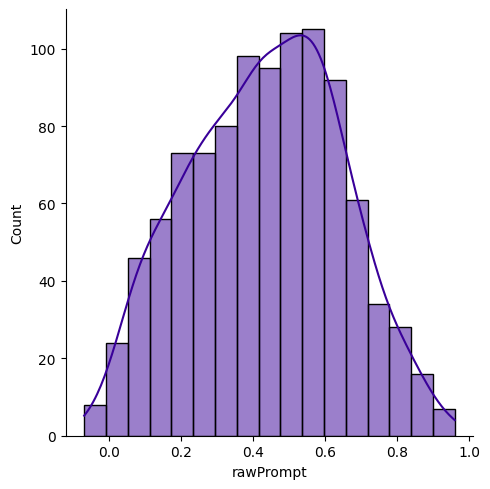

In [ ]:
sns.displot(data=df, x="rawPrompt", kde=True, color="#390099")

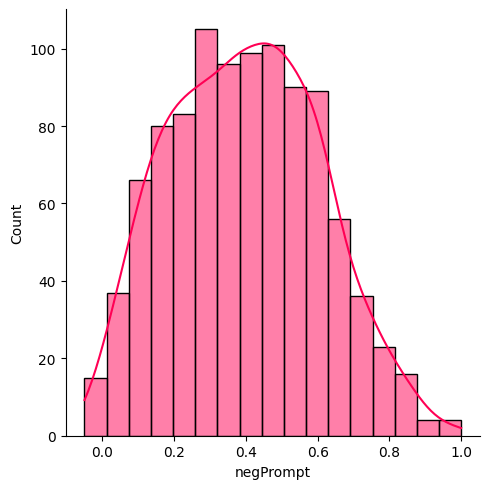

In [ ]:
sns.displot(data=df, x="negPrompt", kde=True, color="#ff0054")


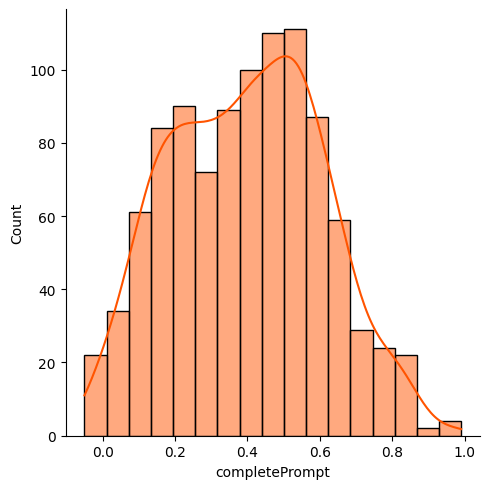

In [ ]:
sns.displot(data=df, x="completePrompt", kde=True, color="#ff5400")


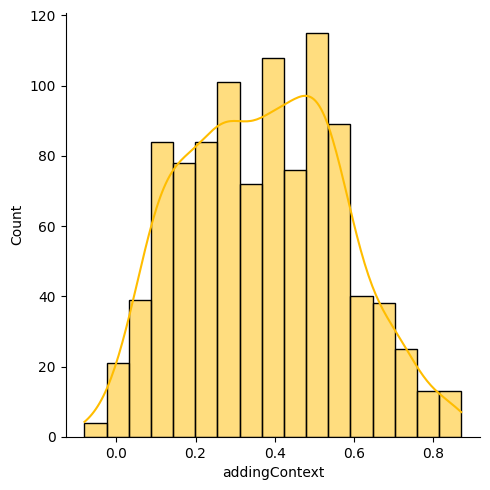

In [ ]:
sns.displot(data=df, x="addingContext", kde=True, color="#ffbd00")

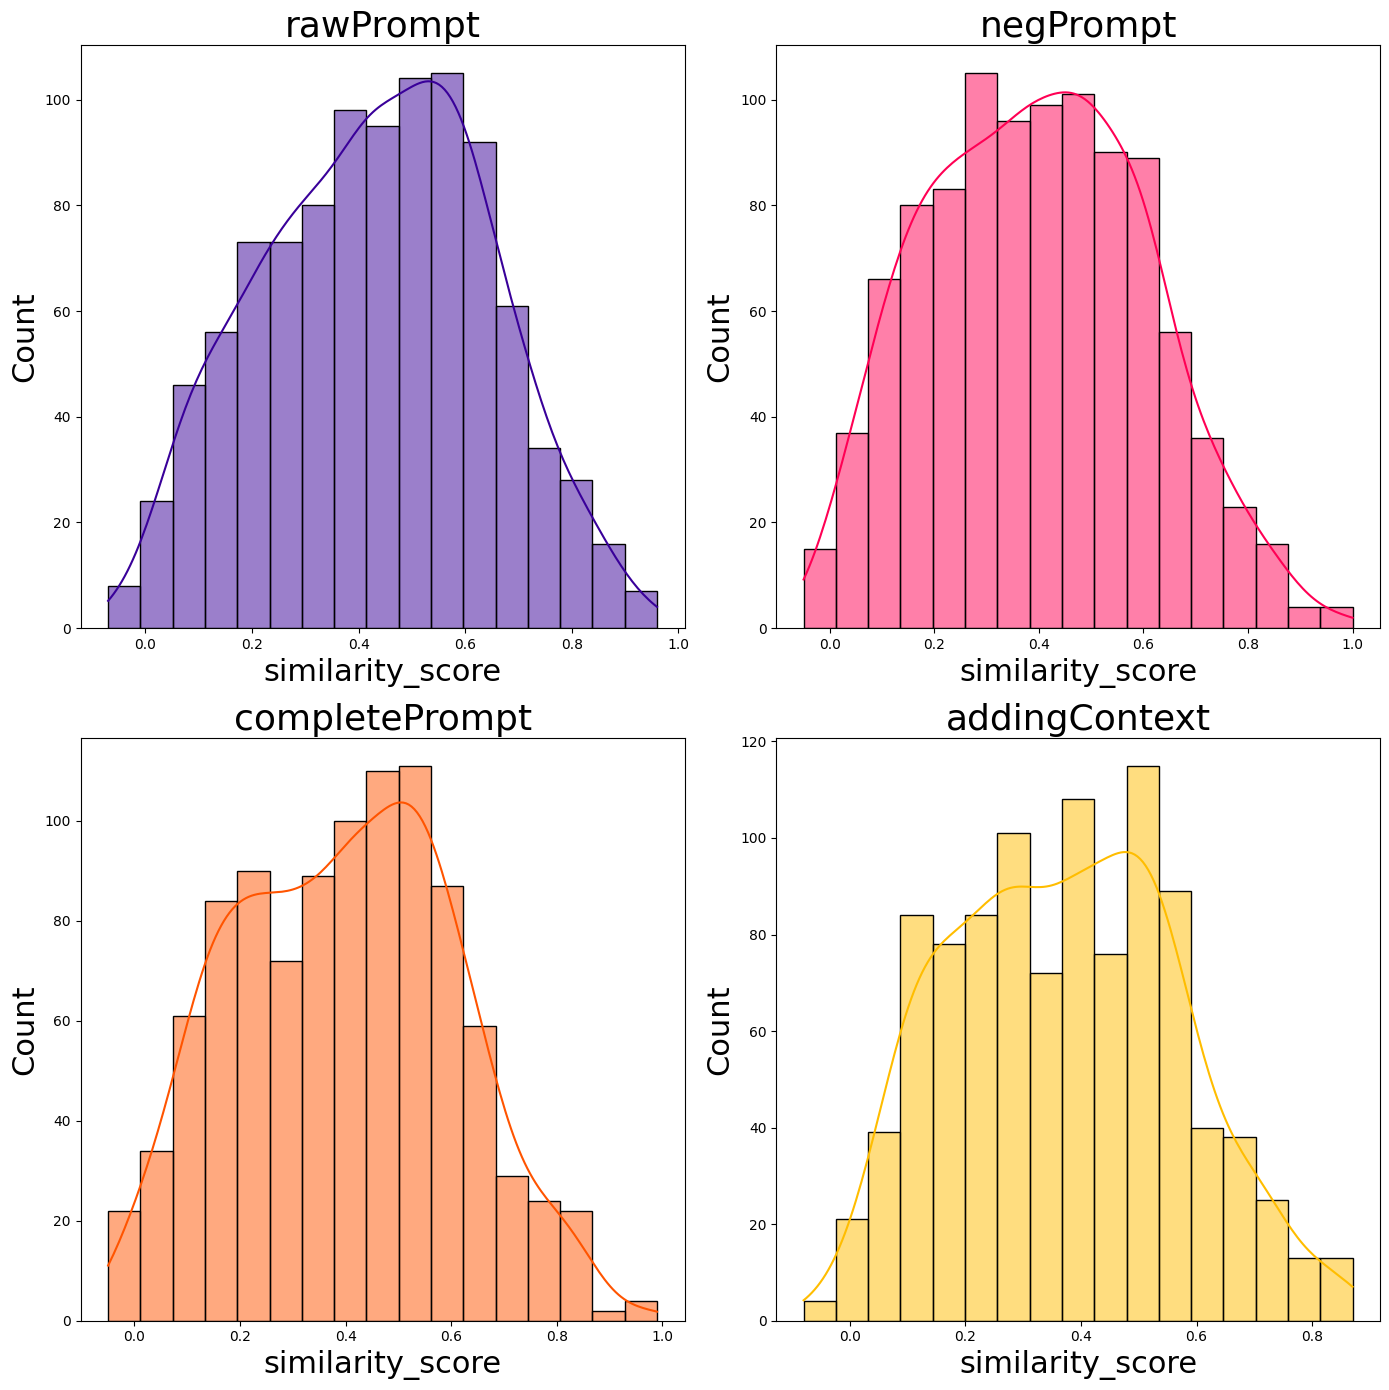

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 14)) # Modifica la dimensione come necessario

# Disegna ogni plot nel suo asse specifico
sns.histplot(data=df, x='rawPrompt', kde=True, color="#390099", ax=axes[0, 0])
axes[0, 0].set_title('rawPrompt', fontsize = 26)
axes[0, 0].set_xlabel('similarity_score', fontsize = 22)
axes[0, 0].set_ylabel('Count',fontsize = 22)

sns.histplot(data=df, x='negPrompt', kde=True, color="#ff0054", ax=axes[0, 1])
axes[0, 1].set_title('negPrompt', fontsize = 26)
axes[0, 1].set_xlabel('similarity_score', fontsize = 22)
axes[0, 1].set_ylabel('Count',fontsize = 22)

sns.histplot(data=df, x='completePrompt', kde=True, color="#ff5400", ax=axes[1, 0])
axes[1, 0].set_title('completePrompt', fontsize = 26)
axes[1, 0].set_xlabel('similarity_score', fontsize = 22)
axes[1, 0].set_ylabel('Count',fontsize = 22)

sns.histplot(data=df, x='addingContext', kde=True, color="#ffbd00", ax=axes[1, 1])
axes[1, 1].set_title('addingContext', fontsize = 26)
axes[1, 1].set_xlabel('similarity_score', fontsize = 22)
axes[1, 1].set_ylabel('Count',fontsize = 22)

# Aggiusta i subplot se necessario
plt.tight_layout()

# Mostra la figura
plt.show()

<ipython-input-10-cd685a2aec0b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='min', palette=color_map_updated, order=category_order)


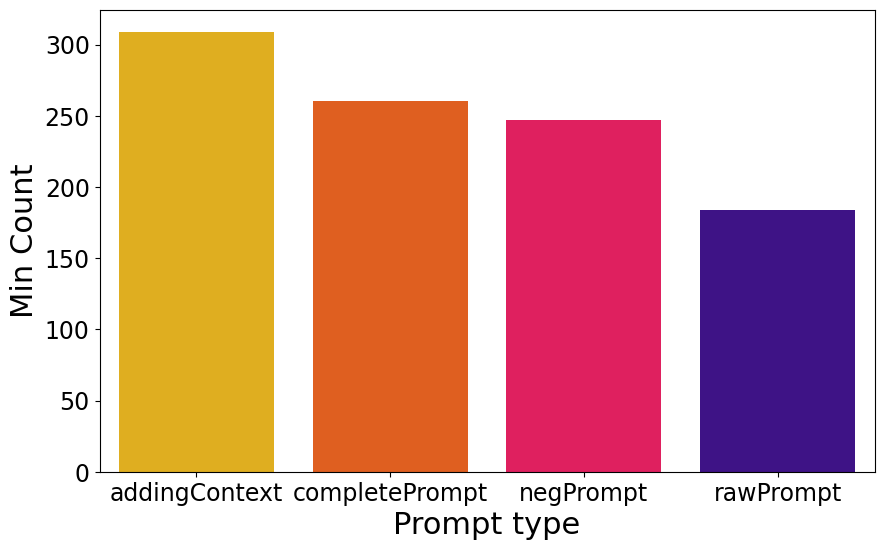

In [ ]:
category_order = df['min'].value_counts().index
# Aggiorniamo la mappa dei colori per rispecchiare la richiesta specifica dell'utente
color_map_updated = {
    'rawPrompt': "#390099",  # Viola
    'negPrompt': "#ff0054",  # Rosa
    'completePrompt': "#ff5400",  # Arancione
    'addingContext': "#ffbd00"   # Giallo
}

# Creiamo nuovamente il grafico con i colori corretti assegnati
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='min', palette=color_map_updated, order=category_order)

# Aggiungiamo titoli e etichette agli assi
plt.xlabel('Prompt type', fontsize = 22)
plt.ylabel('Min Count', fontsize = 22)

plt.xticks(fontsize=17)  # Aumenta il fontsize a 20. Modifica questo valore come preferisci.

# Se necessario, puoi anche aumentare il fontsize delle etichette dell'asse y con:
plt.yticks(fontsize=17)
# Mostra il grafico
plt.show()


<ipython-input-11-8b31499ad135>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='max', palette=palette, order=category_order)


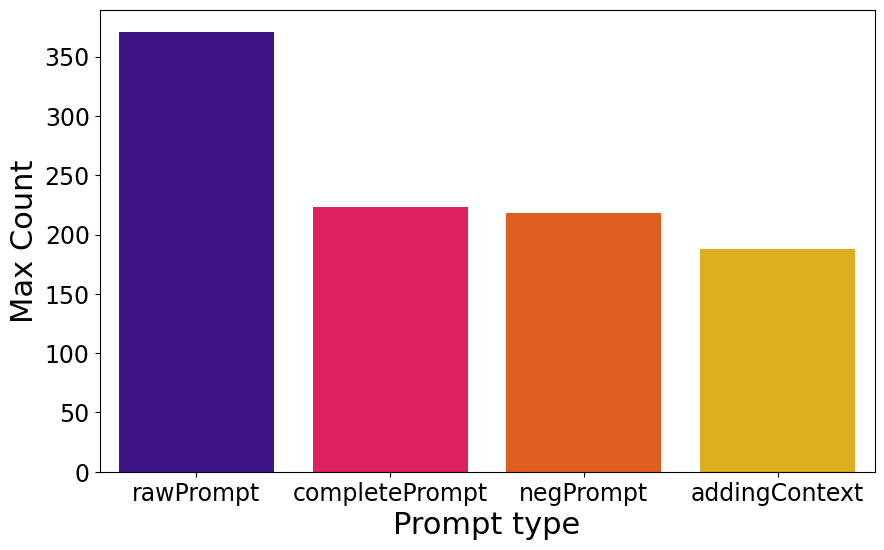

In [ ]:
category_order = df['max'].value_counts().index
palette = ["#390099", "#ff0054", "#ff5400", "#ffbd00"]
# Assegnamo i colori in base all'ordine delle categorie
palette = {category: color for category, color in zip(category_order, palette)}

# Creiamo l'istogramma con i colori assegnati
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='max', palette=palette, order=category_order)

# Aggiungiamo titoli e etichette agli assi
plt.xlabel('Prompt type', fontsize = 22)
plt.ylabel('Max Count', fontsize = 22)
plt.xticks(fontsize=17)  # Aumenta il fontsize a 20. Modifica questo valore come preferisci.

# Se necessario, puoi anche aumentare il fontsize delle etichette dell'asse y con:
plt.yticks(fontsize=17)

# Mostra il grafico
plt.show()

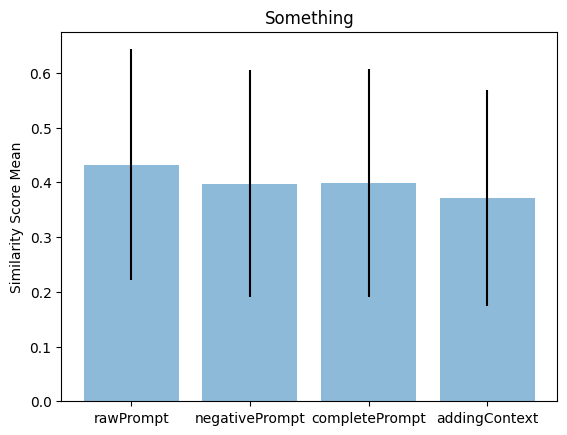

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

prompt = ('rawPrompt', 'negativePrompt', 'completePrompt', 'addingContext')
y_pos = np.arange(len(prompt))
df1_mean = df['rawPrompt'].mean()
df1_std = df['rawPrompt'].std()
df2_mean = df['negPrompt'].mean()
df2_std = df['negPrompt'].std()
df3_mean = df['completePrompt'].mean()
df3_std = df['completePrompt'].std()
df4_mean = df['addingContext'].mean()
df4_std = df['addingContext'].std()

value = (df1_mean, df2_mean, df3_mean, df4_mean)
Std = (df1_std, df2_std, df3_std, df4_std)

plt.bar(y_pos, value, yerr=Std, align='center', alpha=0.5)
plt.xticks(y_pos, prompt)
plt.ylabel('Similarity Score Mean')
plt.title('Something')
plt.show()

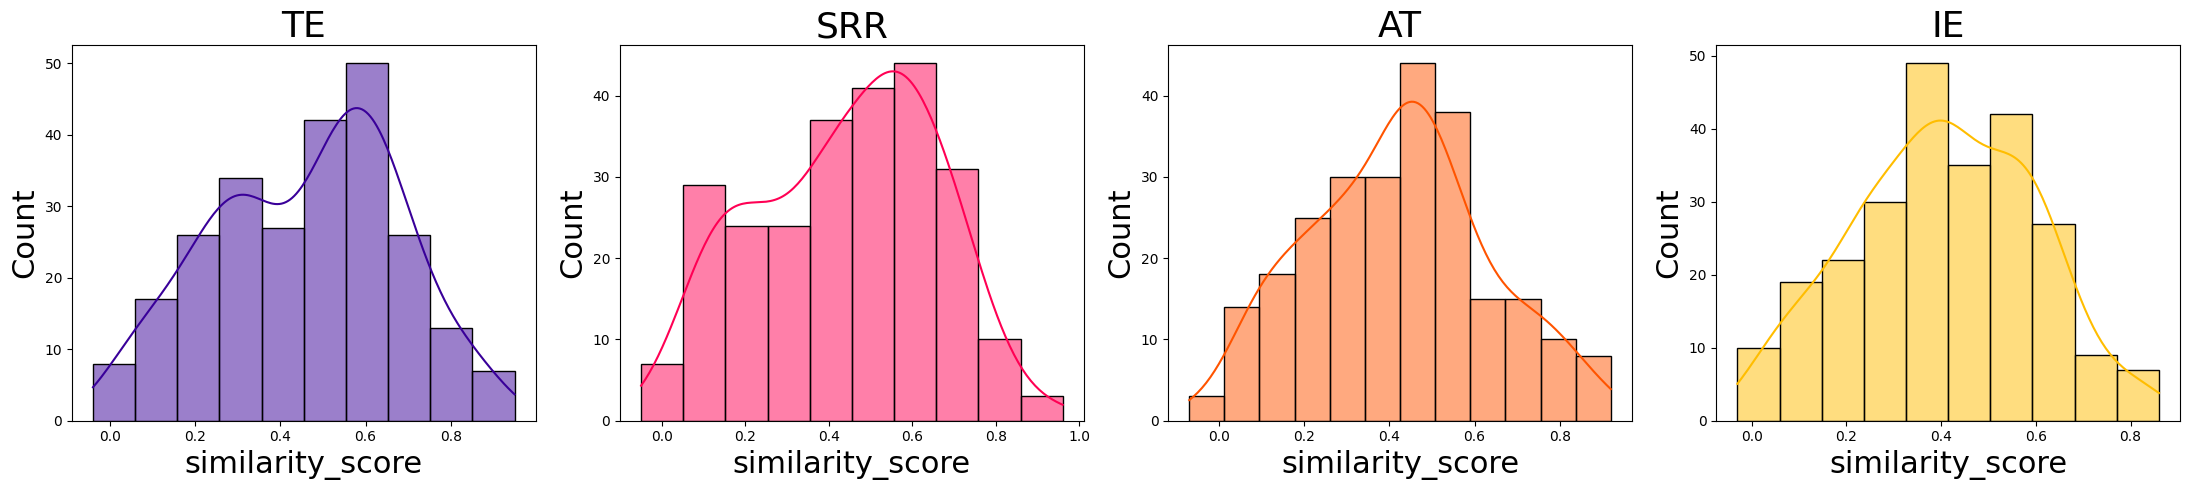

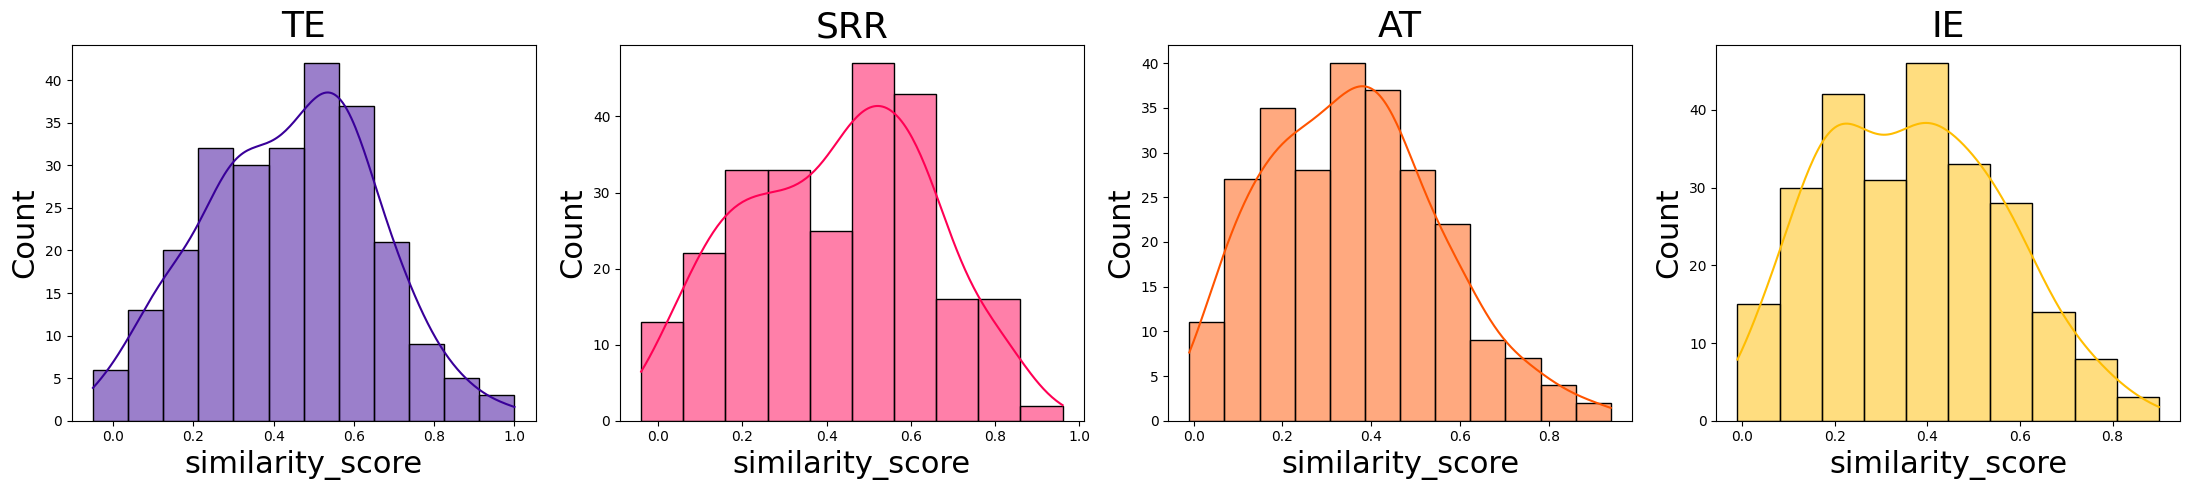

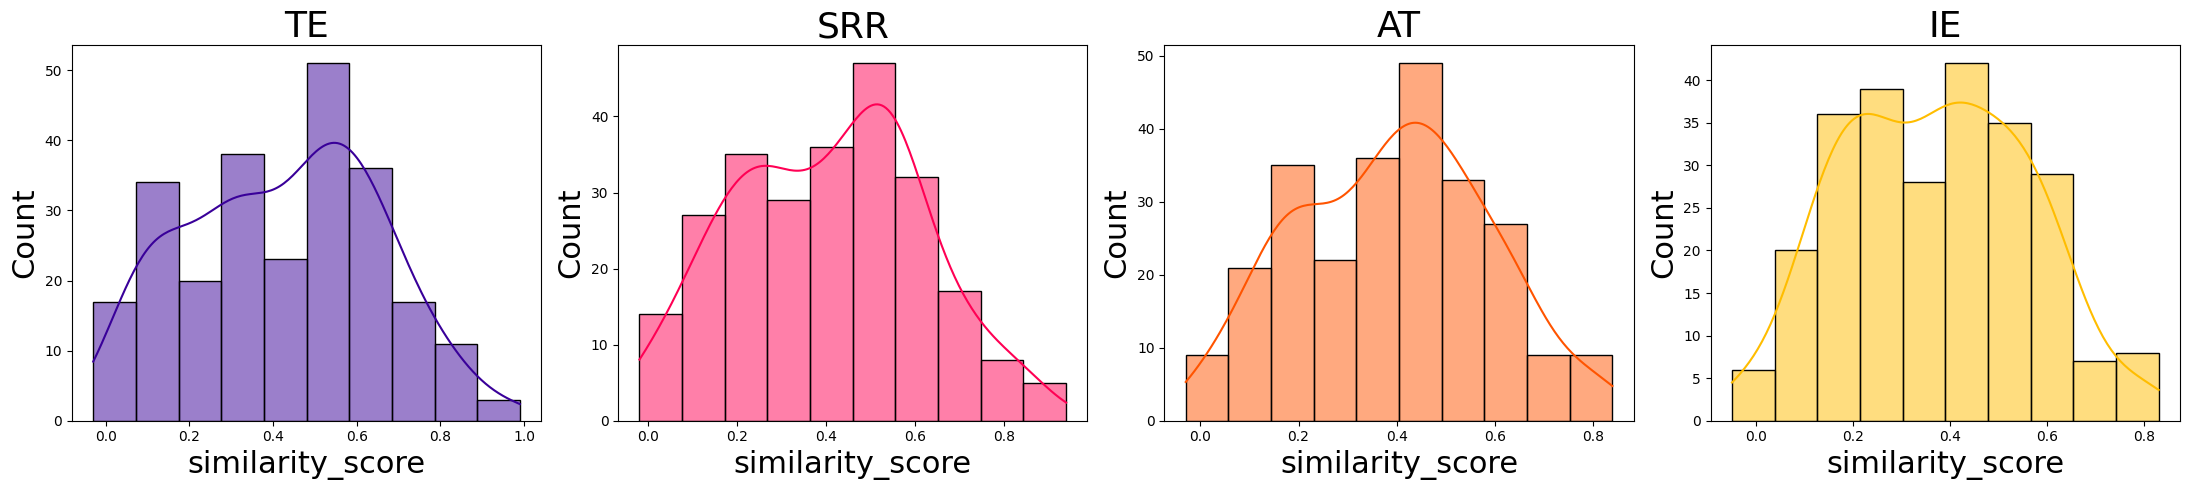

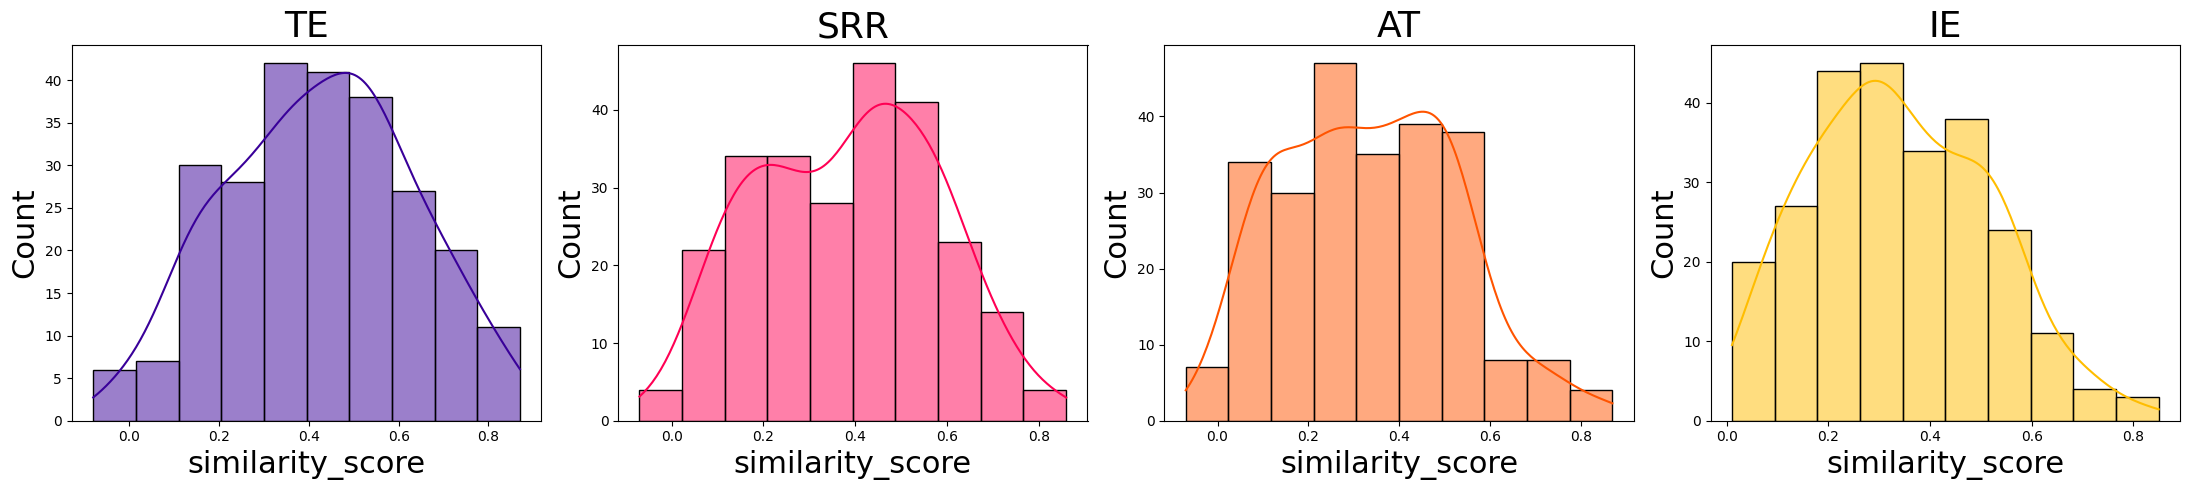

In [ ]:
df1 =  data[data['Type'] == 'TE']
df2 =  data[data['Type'] == 'SRR']
df3 =  data[data['Type'] == 'AT']
df4 =  data[data['Type'] == 'IE']

id_TE = df1['ID']
id_SRR = df2['ID']
id_AT = df3['ID']
id_IE = df4['ID']

prompts = ["rawPrompt","negPrompt","completePrompt","addingContext"]

for prompt in prompts:
  df_TE = df[df['ID'].isin(id_TE)]
  scores_TE = df_TE[prompt]
  scores_TE = pd.DataFrame(scores_TE)

  df_SRR = df[df['ID'].isin(id_SRR)]
  scores_SRR = df_SRR[prompt]
  scores_SRR = pd.DataFrame(scores_SRR)

  df_AT = df[df['ID'].isin(id_AT)]
  scores_AT = df_AT[prompt]
  scores_AT = pd.DataFrame(scores_AT)

  df_IE = df[df['ID'].isin(id_IE)]
  scores_IE = df_IE[prompt]
  scores_IE = pd.DataFrame(scores_IE)

  fig, axes = plt.subplots(1, 4, figsize=(22, 5)) # Aumenta la larghezza per accomodare tutti i plot su una riga

  # Disegna ogni plot nel suo asse specifico
  sns.histplot(data=scores_TE, x=prompt, kde=True, color="#390099", ax=axes[0])
  axes[0].set_title('TE', fontsize = 26)
  axes[0].set_xlabel('similarity_score', fontsize = 22)
  axes[0].set_ylabel('Count',fontsize = 22)

  sns.histplot(data=scores_SRR, x=prompt, kde=True, color="#ff0054", ax=axes[1])
  axes[1].set_title('SRR', fontsize = 26)
  axes[1].set_xlabel('similarity_score', fontsize = 22)
  axes[1].set_ylabel('Count',fontsize = 22)

  sns.histplot(data=scores_AT, x=prompt, kde=True, color="#ff5400", ax=axes[2])
  axes[2].set_title('AT', fontsize = 26)
  axes[2].set_xlabel('similarity_score', fontsize = 22)
  axes[2].set_ylabel('Count',fontsize = 22)

  sns.histplot(data=scores_IE, x=prompt, kde=True, color="#ffbd00", ax=axes[3])
  axes[3].set_title('IE', fontsize = 26)
  axes[3].set_xlabel('similarity_score', fontsize = 22)
  axes[3].set_ylabel('Count',fontsize = 22)

  # Aggiusta i subplot se necessario
  plt.tight_layout()

  # Mostra la figura
  plt.show()

##CLIP

In [ ]:
path = "/content/Mydrive/MyDrive/Tirocinio/CLIP_similarity.csv"
df_CLIP = pd.read_csv(path)

In [ ]:
df_CLIP.head()

,ID,rawPrompt,negPrompt,completePrompt,addingContext,min,max,std
0,1,0.288077,0.276582,0.326580,0.327344,negPrompt,addingContext,0.03
1,2,0.365585,0.269135,0.321543,0.297400,negPrompt,rawPrompt,0.04
2,3,0.358114,0.342107,0.348032,0.285023,addingContext,rawPrompt,0.03
3,4,0.336425,0.315797,0.306103,0.219212,addingContext,rawPrompt,0.05
4,5,0.326158,0.329957,0.306675,0.346412,completePrompt,addingContext,0.02


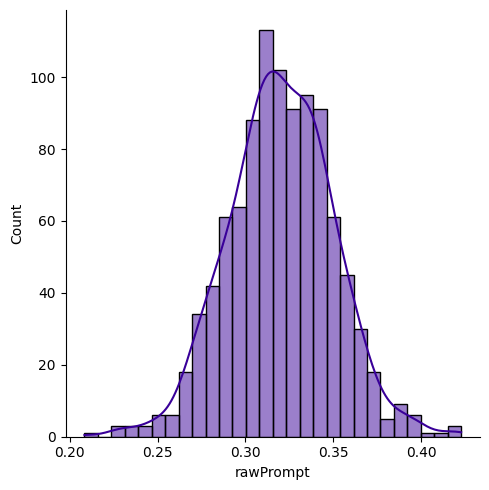

In [ ]:
sns.displot(data=df_CLIP, x="rawPrompt", kde=True, color="#390099")

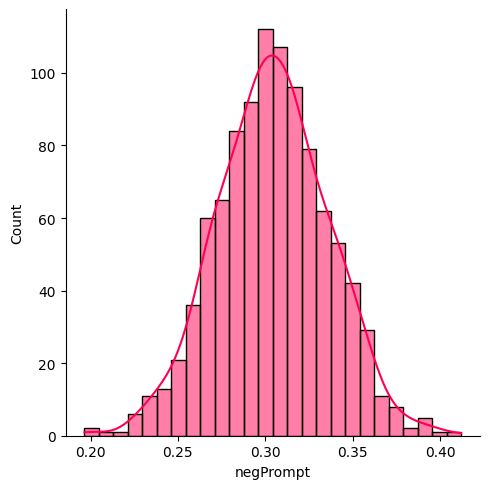

In [ ]:
sns.displot(data=df_CLIP, x="negPrompt", kde=True, color="#ff0054")

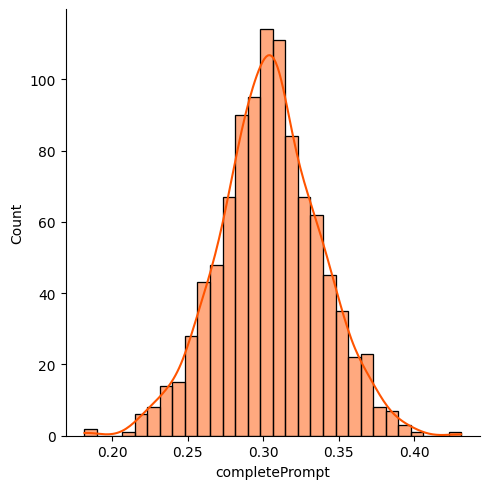

In [ ]:
sns.displot(data=df_CLIP, x="completePrompt", kde=True, color="#ff5400")

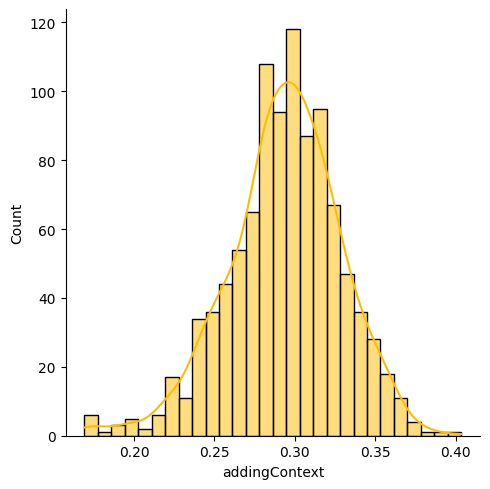

In [ ]:
sns.displot(data=df_CLIP, x="addingContext", kde=True, color="#ffbd00")

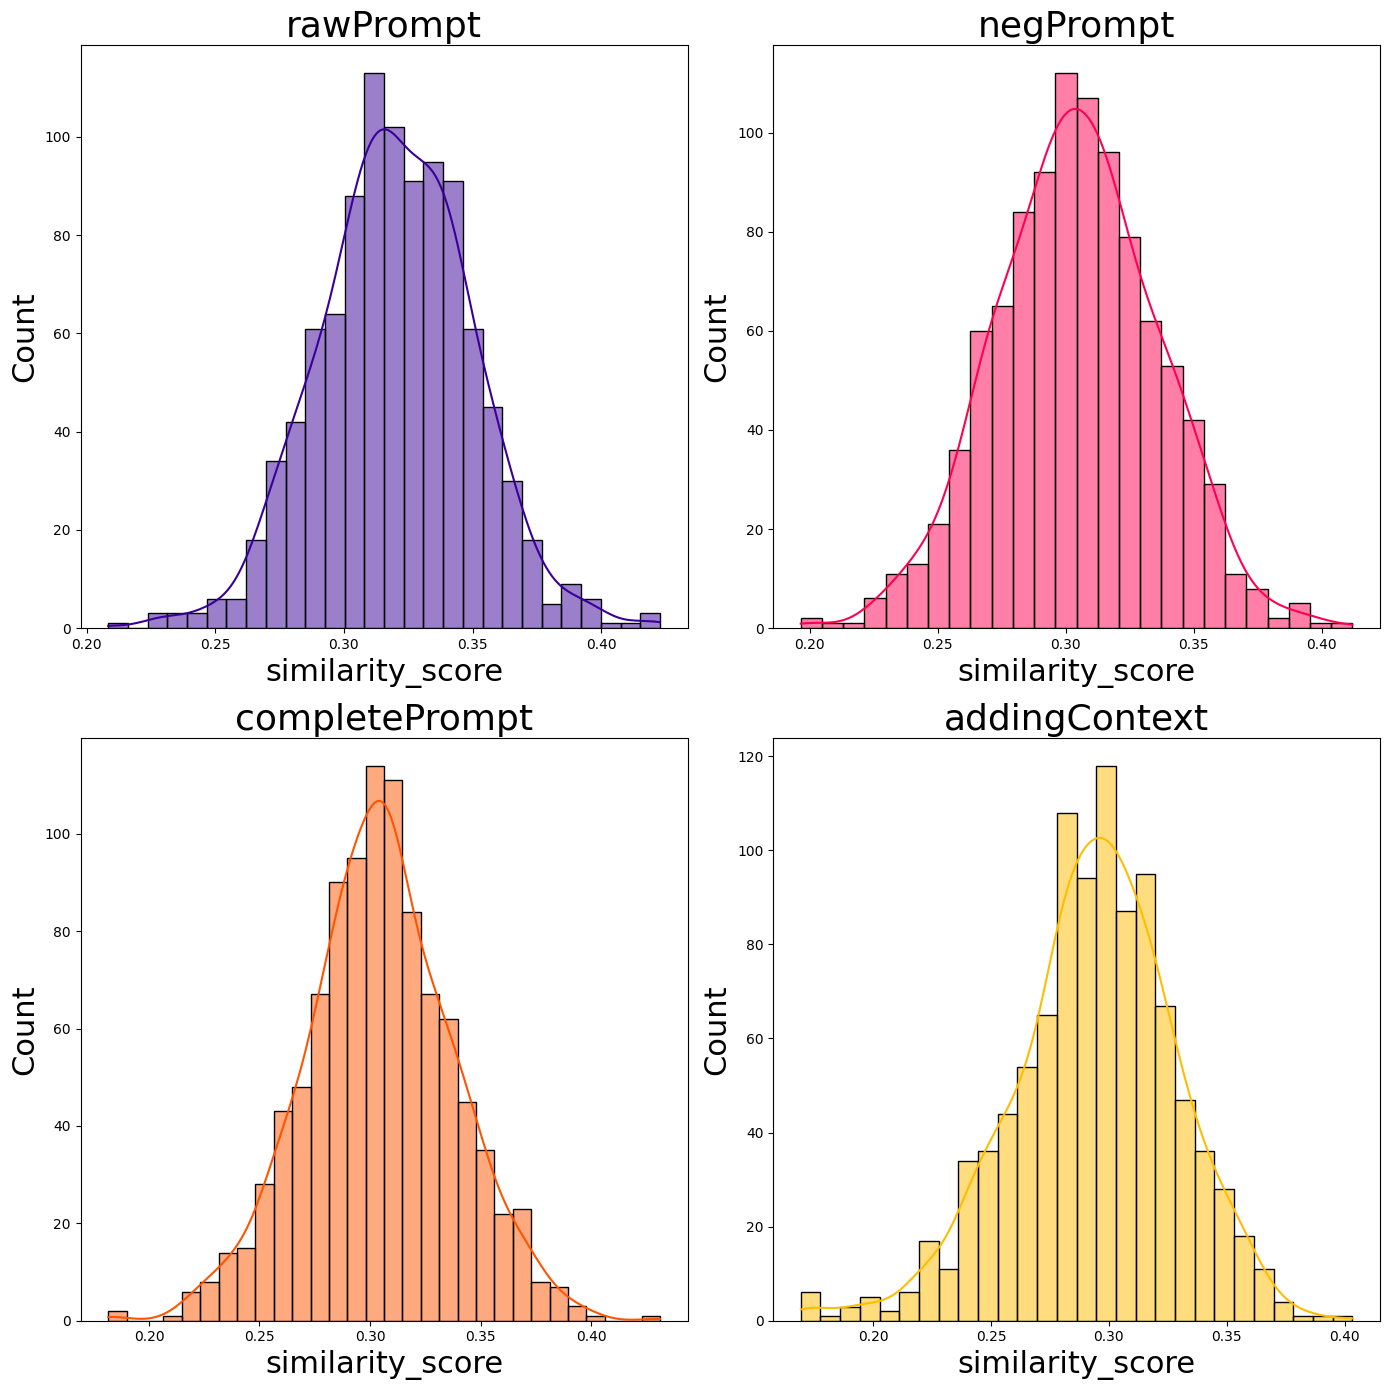

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 14)) # Modifica la dimensione come necessario

# Disegna ogni plot nel suo asse specifico
sns.histplot(data=df_CLIP, x='rawPrompt', kde=True, color="#390099", ax=axes[0, 0])
axes[0, 0].set_title('rawPrompt', fontsize = 26)
axes[0, 0].set_xlabel('similarity_score', fontsize = 22)
axes[0, 0].set_ylabel('Count',fontsize = 22)

sns.histplot(data=df_CLIP, x='negPrompt', kde=True, color="#ff0054", ax=axes[0, 1])
axes[0, 1].set_title('negPrompt', fontsize = 26)
axes[0, 1].set_xlabel('similarity_score', fontsize = 22)
axes[0, 1].set_ylabel('Count',fontsize = 22)

sns.histplot(data=df_CLIP, x='completePrompt', kde=True, color="#ff5400", ax=axes[1, 0])
axes[1, 0].set_title('completePrompt', fontsize = 26)
axes[1, 0].set_xlabel('similarity_score', fontsize = 22)
axes[1, 0].set_ylabel('Count',fontsize = 22)

sns.histplot(data=df_CLIP, x='addingContext', kde=True, color="#ffbd00", ax=axes[1, 1])
axes[1, 1].set_title('addingContext', fontsize = 26)
axes[1, 1].set_xlabel('similarity_score', fontsize = 22)
axes[1, 1].set_ylabel('Count',fontsize = 22)

# Aggiusta i subplot se necessario
plt.tight_layout()

# Mostra la figura
plt.show()

<ipython-input-21-6d872d41c03e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_CLIP, x='min', palette=color_map_updated, order=category_order)


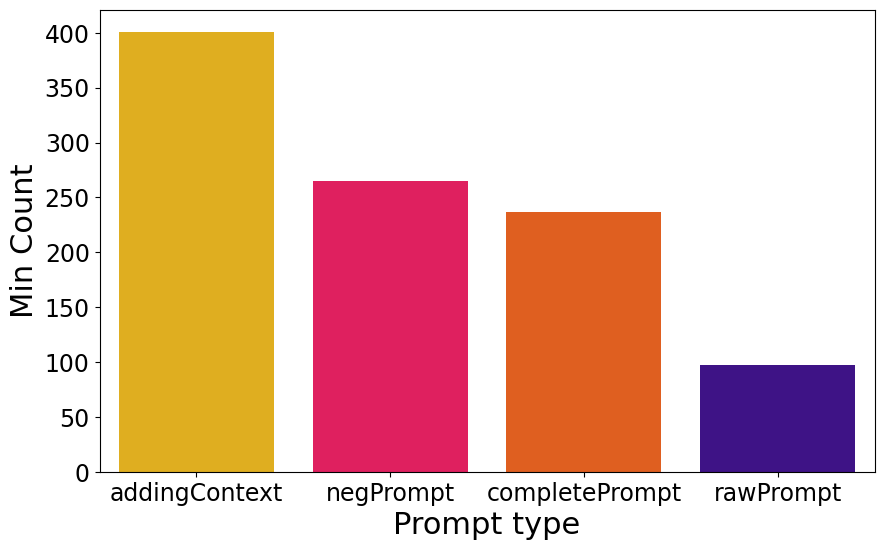

In [ ]:
category_order = df_CLIP['min'].value_counts().index
# Aggiorniamo la mappa dei colori per rispecchiare la richiesta specifica dell'utente
color_map_updated = {
    'rawPrompt': "#390099",  # Viola
    'negPrompt': "#ff0054",  # Rosa
    'completePrompt': "#ff5400",  # Arancione
    'addingContext': "#ffbd00"   # Giallo
}

# Creiamo nuovamente il grafico con i colori corretti assegnati
plt.figure(figsize=(10, 6))
sns.countplot(data=df_CLIP, x='min', palette=color_map_updated, order=category_order)

# Aggiungiamo titoli e etichette agli assi
plt.xlabel('Prompt type', fontsize = 22)
plt.ylabel('Min Count', fontsize = 22)

plt.xticks(fontsize=17)  # Aumenta il fontsize a 20. Modifica questo valore come preferisci.
# Se necessario, puoi anche aumentare il fontsize delle etichette dell'asse y con:
plt.yticks(fontsize=17)

# Mostra il grafico
plt.show()


<ipython-input-22-5a688ca83762>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_CLIP, x='max', palette=palette, order=category_order)


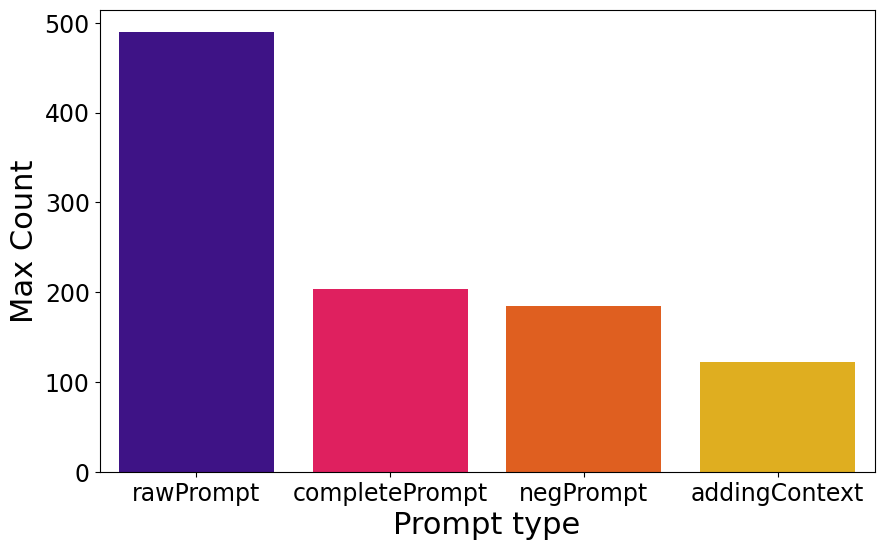

In [ ]:
category_order = df_CLIP['max'].value_counts().index
palette = ["#390099", "#ff0054", "#ff5400", "#ffbd00"]
# Assegnamo i colori in base all'ordine delle categorie
palette = {category: color for category, color in zip(category_order, palette)}

# Creiamo l'istogramma con i colori assegnati
plt.figure(figsize=(10, 6))
sns.countplot(data=df_CLIP, x='max', palette=palette, order=category_order)

# Aggiungiamo titoli e etichette agli assi
plt.xlabel('Prompt type', fontsize = 22)
plt.ylabel('Max Count', fontsize = 22)

plt.xticks(fontsize=17)  # Aumenta il fontsize a 20. Modifica questo valore come preferisci.

# Se necessario, puoi anche aumentare il fontsize delle etichette dell'asse y con:
plt.yticks(fontsize=17)

# Mostra il grafico
plt.show()

In [ ]:
df = df_CLIP

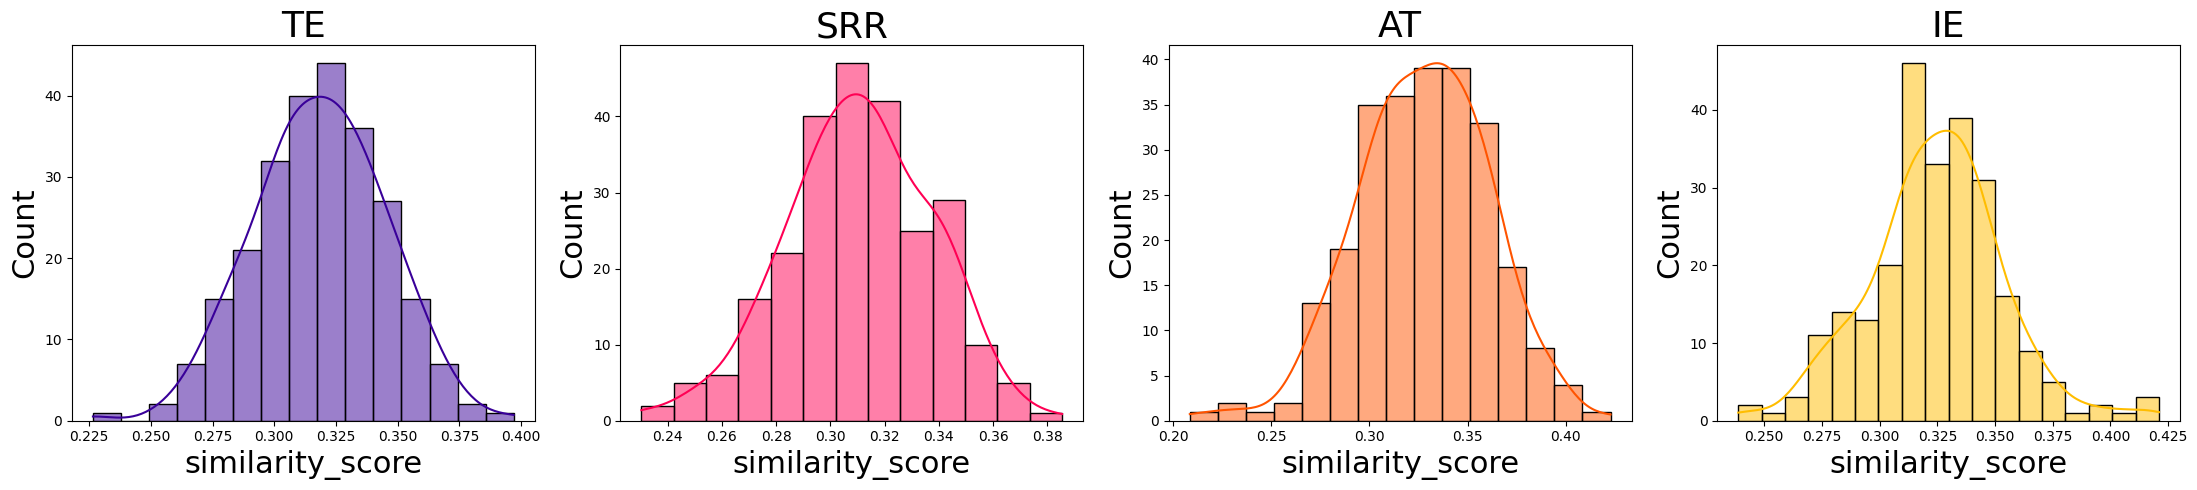

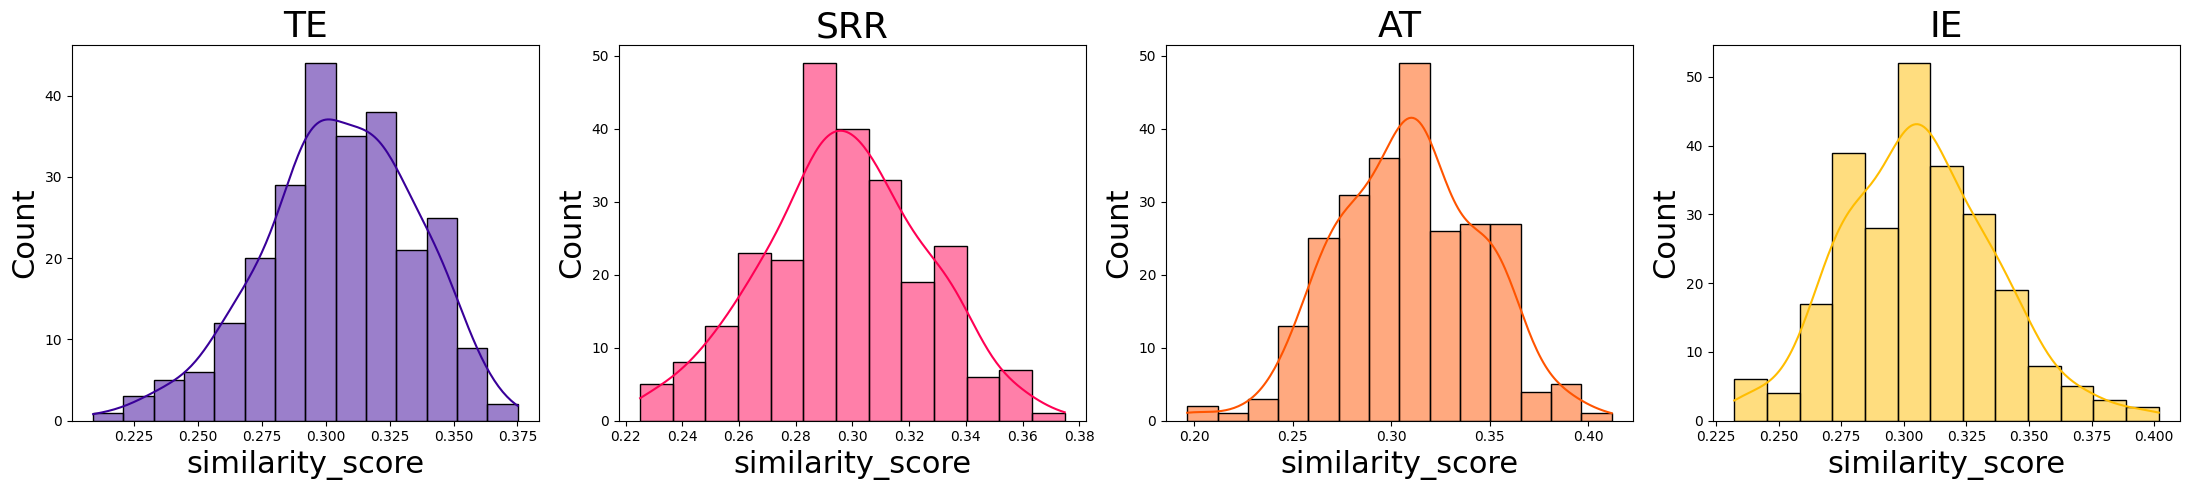

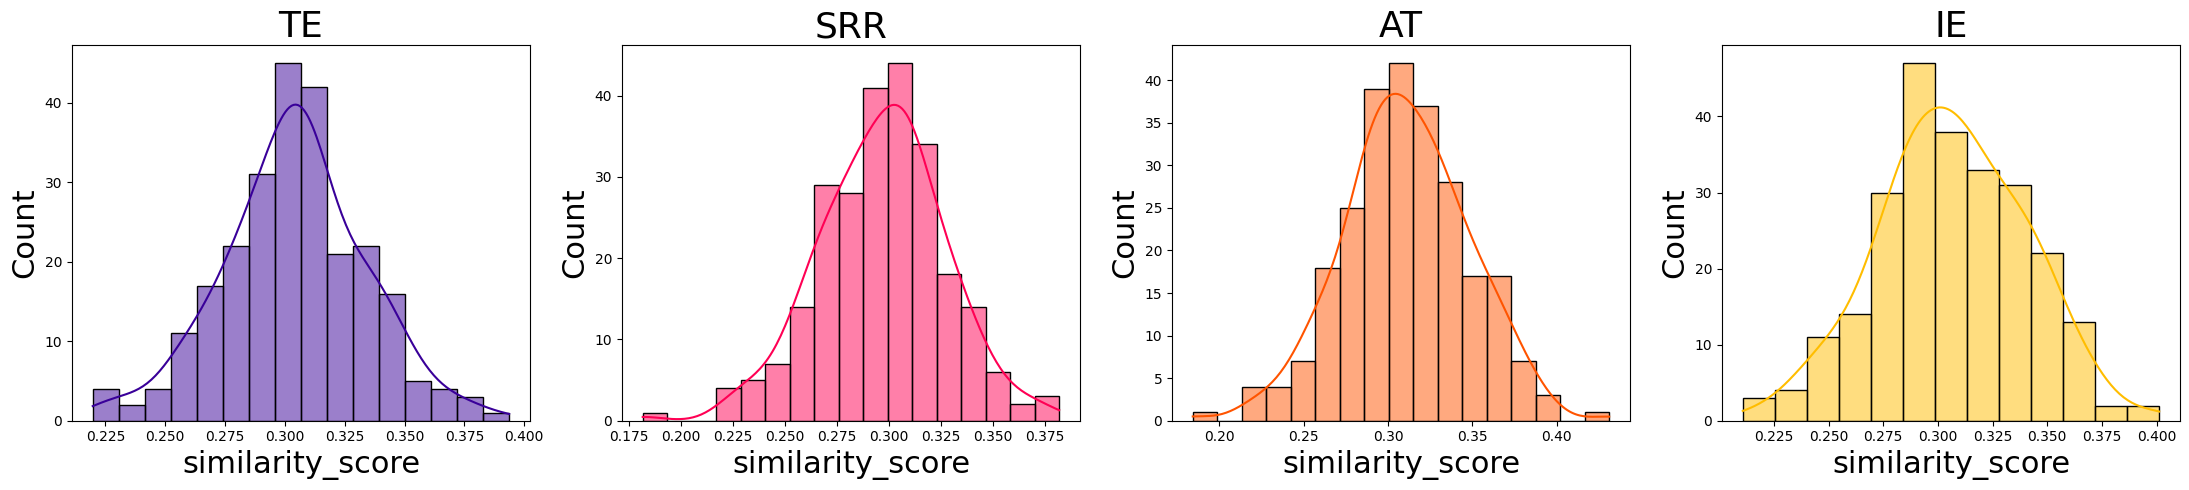

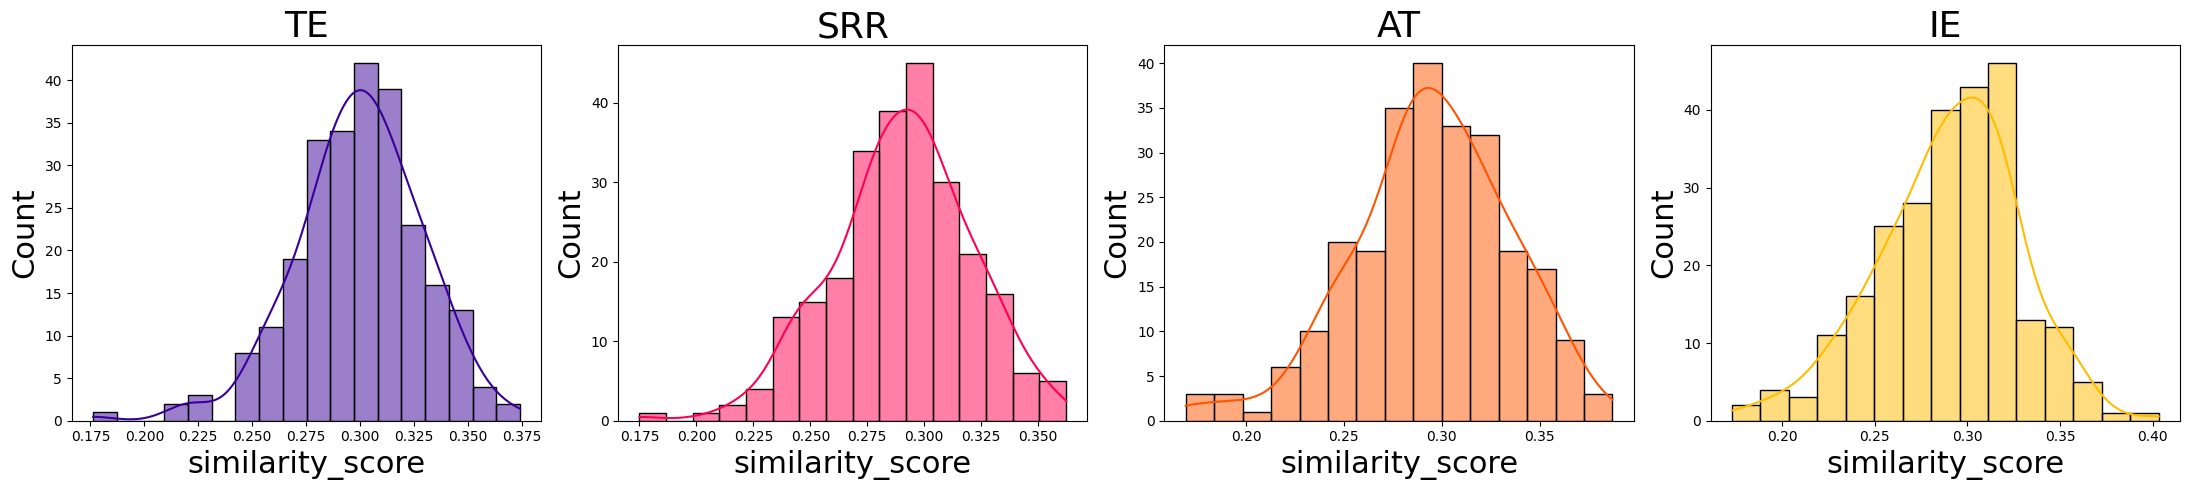

In [ ]:
df1 =  data[data['Type'] == 'TE']
df2 =  data[data['Type'] == 'SRR']
df3 =  data[data['Type'] == 'AT']
df4 =  data[data['Type'] == 'IE']

id_TE = df1['ID']
id_SRR = df2['ID']
id_AT = df3['ID']
id_IE = df4['ID']

prompts = ["rawPrompt","negPrompt","completePrompt","addingContext"]

for prompt in prompts:
  df_TE = df[df['ID'].isin(id_TE)]
  scores_TE = df_TE[prompt]
  scores_TE = pd.DataFrame(scores_TE)

  df_SRR = df[df['ID'].isin(id_SRR)]
  scores_SRR = df_SRR[prompt]
  scores_SRR = pd.DataFrame(scores_SRR)

  df_AT = df[df['ID'].isin(id_AT)]
  scores_AT = df_AT[prompt]
  scores_AT = pd.DataFrame(scores_AT)

  df_IE = df[df['ID'].isin(id_IE)]
  scores_IE = df_IE[prompt]
  scores_IE = pd.DataFrame(scores_IE)

  fig, axes = plt.subplots(1, 4, figsize=(22, 5)) # Aumenta la larghezza per accomodare tutti i plot su una riga

  # Disegna ogni plot nel suo asse specifico
  sns.histplot(data=scores_TE, x=prompt, kde=True, color="#390099", ax=axes[0])
  axes[0].set_title('TE', fontsize = 26)
  axes[0].set_xlabel('similarity_score', fontsize = 22)
  axes[0].set_ylabel('Count',fontsize = 22)

  sns.histplot(data=scores_SRR, x=prompt, kde=True, color="#ff0054", ax=axes[1])
  axes[1].set_title('SRR', fontsize = 26)
  axes[1].set_xlabel('similarity_score', fontsize = 22)
  axes[1].set_ylabel('Count',fontsize = 22)

  sns.histplot(data=scores_AT, x=prompt, kde=True, color="#ff5400", ax=axes[2])
  axes[2].set_title('AT', fontsize = 26)
  axes[2].set_xlabel('similarity_score', fontsize = 22)
  axes[2].set_ylabel('Count',fontsize = 22)

  sns.histplot(data=scores_IE, x=prompt, kde=True, color="#ffbd00", ax=axes[3])
  axes[3].set_title('IE', fontsize = 26)
  axes[3].set_xlabel('similarity_score', fontsize = 22)
  axes[3].set_ylabel('Count',fontsize = 22)

  # Aggiusta i subplot se necessario
  plt.tight_layout()

  # Mostra la figura
  plt.show()